## <span style="color:#db7d60">Setup</span>

In [3]:
%load_ext autoreload
%autoreload 2

import json
import math
import pickle
import numpy as np
import pandas as pd
import textwrap
import sys
from pathlib import Path
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

# pUtil needs to be loaded from the root directory
parent_dir = Path().resolve().parent
sys.path.insert(0, str(parent_dir))

import pUtil
from analysis_common import *

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

## <span style="color:#db7d60">Comparisions</span>

#### Comparing different learning rates and their effect on validation loss and the model distributions

In [11]:
models_to_compare = ['model_5_3_1', 'model_5_3_2', 'model_5_3_3', 'model_5_3_4', 'model_5_3_5', 'model_5_3_6', 'model_5_3_7', 'model_5_3_8', 'model_5_3_9', 'model_5_3_10', 'model_5_3_11', 'model_5_3_12',]
df = get_default_df(models_to_compare)
df = df.sort_values(by='min_saved_val_loss')

# Calculate log10 values for the logarithmic plot
df['learning_rate_log10'] = np.log10(df['learning_rate'])
df['min_lr_log10'] = np.log10(df['min_lr'])

display(df)

,model_name,vocab_size,max_sequence_length,num_train_tokens,num_val_tokens,batch_size,block_size,learning_rate,min_lr,lr_decay_iters,n_layer,n_head,n_embd,scheme,preparation_name,iters_trained,min_saved_train_loss,min_saved_val_loss,coverage,mmd,kpd_median,kpd_error,fpd_value,fpd_error,w1m_score,w1m_score_std,w1p_avg_eta,w1p_avg_phi,w1p_avg_pt,w1p_avg_eta_std,w1p_avg_phi_std,w1p_avg_pt_std,learning_rate_log10,min_lr_log10
9,model_5_3_10,3545,289,2554562035,283840483,12,578,1.000000e-03,1.000000e-05,10000,6,8,512,standard,preparation_5_3,29470,0.801540,0.785396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,-5.000000
2,model_5_3_3,3545,289,2554562035,283840483,12,578,1.000000e-03,1.000000e-04,10000,6,8,512,standard,preparation_5_3,4490,0.793655,0.789780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,-4.000000
3,model_5_3_4,3545,289,2554562035,283840483,12,578,1.000000e-03,1.000000e-04,2000,12,8,512,standard,preparation_5_3,3990,0.803264,0.793859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,-4.000000
8,model_5_3_9,3545,289,2554562035,283840483,12,578,1.000000e-04,1.000000e-05,1000,6,8,512,standard,preparation_5_3,25390,0.816961,0.801240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,-5.000000
11,model_5_3_12,3545,289,2554562035,283840483,12,578,1.000000e-03,7.000000e-04,20000,6,8,512,standard,preparation_5_3,5990,0.810838,0.802716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,-3.154902
0,model_5_3_1,3545,289,2554562035,283840483,64,1156,1.000000e-04,1.000000e-05,1000,24,16,1024,standard,preparation_5_3,1190,0.808022,0.807825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,-5.000000
1,model_5_3_2,3545,289,2554562035,283840483,2048,289,1.000000e-04,1.000000e-06,1000,3,4,512,standard,preparation_5_3,1170,0.854815,0.854573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,-6.000000
7,model_5_3_8,3545,289,2554562035,283840483,12,578,1.000000e-04,1.000000e-07,1000,6,8,512,standard,preparation_5_3,16770,0.871133,0.858287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,-7.000000
10,model_5_3_11,3545,289,2554562035,283840483,12,578,1.000000e-02,1.000000e-04,20000,6,8,512,standard,preparation_5_3,7580,0.917962,0.925268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,-4.000000
6,model_5_3_7,3545,289,2554562035,283840483,12,578,1.000000e-05,1.000000e-08,1000,6,8,512,standard,preparation_5_3,17140,1.283220,1.257672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,-8.000000


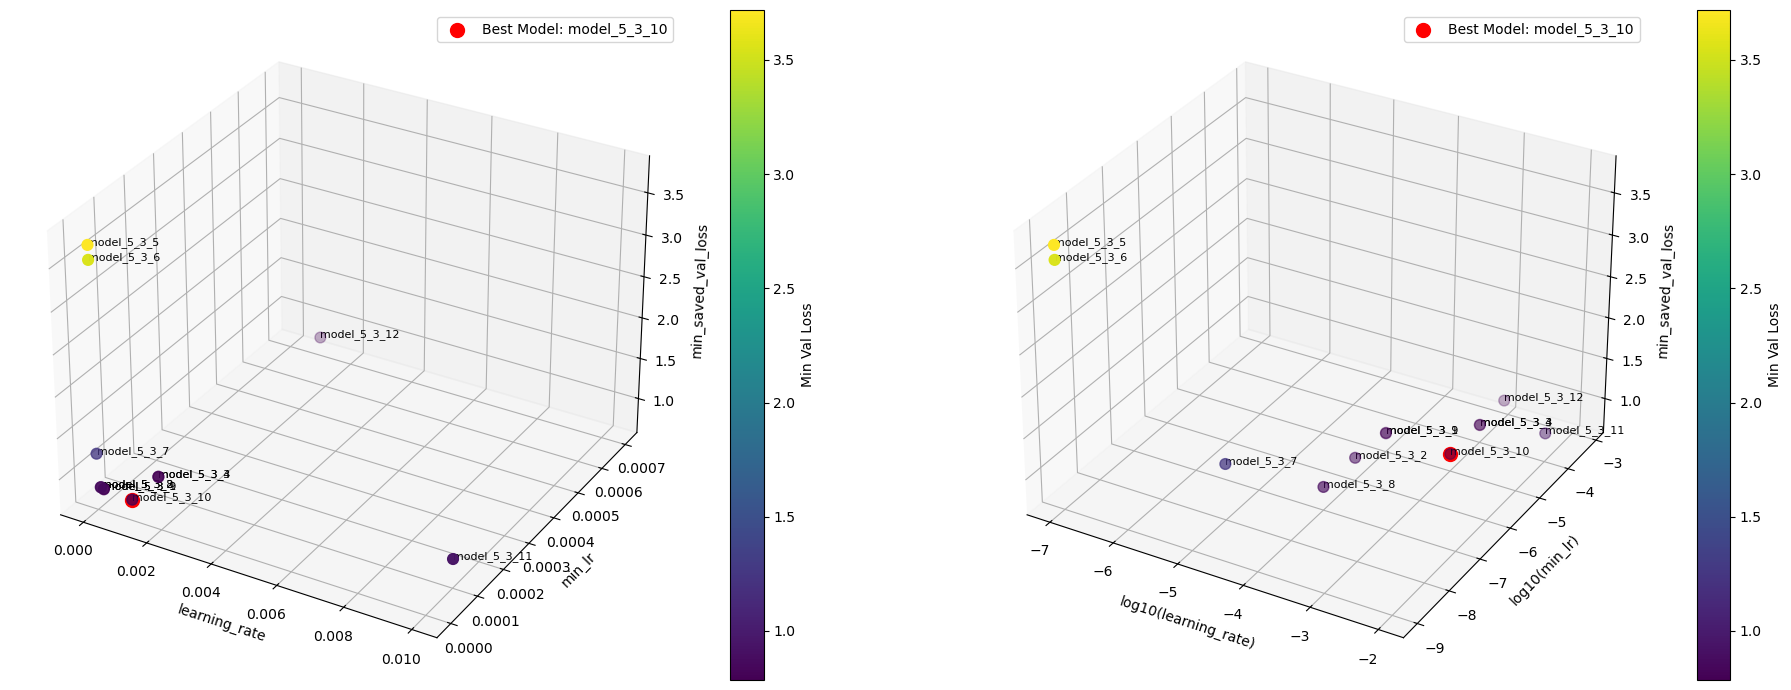

In [7]:
min_val_loss_row = df.loc[df['min_saved_val_loss'].idxmin()]

# Normal plot
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax.scatter(df['learning_rate'], df['min_lr'], df['min_saved_val_loss'], c=df['min_saved_val_loss'], cmap='viridis', s=60)
ax.scatter([min_val_loss_row['learning_rate']], [min_val_loss_row['min_lr']], [min_val_loss_row['min_saved_val_loss']], color='red', s=100, label=f'Best Model: {min_val_loss_row["model_name"]}')
for x, y, z, label in zip(df['learning_rate'], df['min_lr'], df['min_saved_val_loss'], df['model_name']):
    ax.text(x, y, z, label, size=8)
ax.set_xlabel('learning_rate')
ax.set_ylabel('min_lr')
ax.set_zlabel('min_saved_val_loss')
fig.colorbar(scatter, ax=ax, label='Min Val Loss')
ax.legend()

# Log plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax.scatter(df['learning_rate_log10'], df['min_lr_log10'], df['min_saved_val_loss'], c=df['min_saved_val_loss'], cmap='viridis', s=60)
ax.scatter([min_val_loss_row['learning_rate_log10']], [min_val_loss_row['min_lr_log10']], [min_val_loss_row['min_saved_val_loss']], color='red', s=100, label=f'Best Model: {min_val_loss_row["model_name"]}')
for x, y, z, label in zip(df['learning_rate_log10'], df['min_lr_log10'], df['min_saved_val_loss'], df['model_name']):
    ax.text(x, y, z, label, size=8)
ax.set_xlabel('log10(learning_rate)')
ax.set_ylabel('log10(min_lr)')
ax.set_zlabel('min_saved_val_loss')
fig.colorbar(scatter, ax=ax, label='Min Val Loss')
ax.legend()
plt.tight_layout()
plt.show()

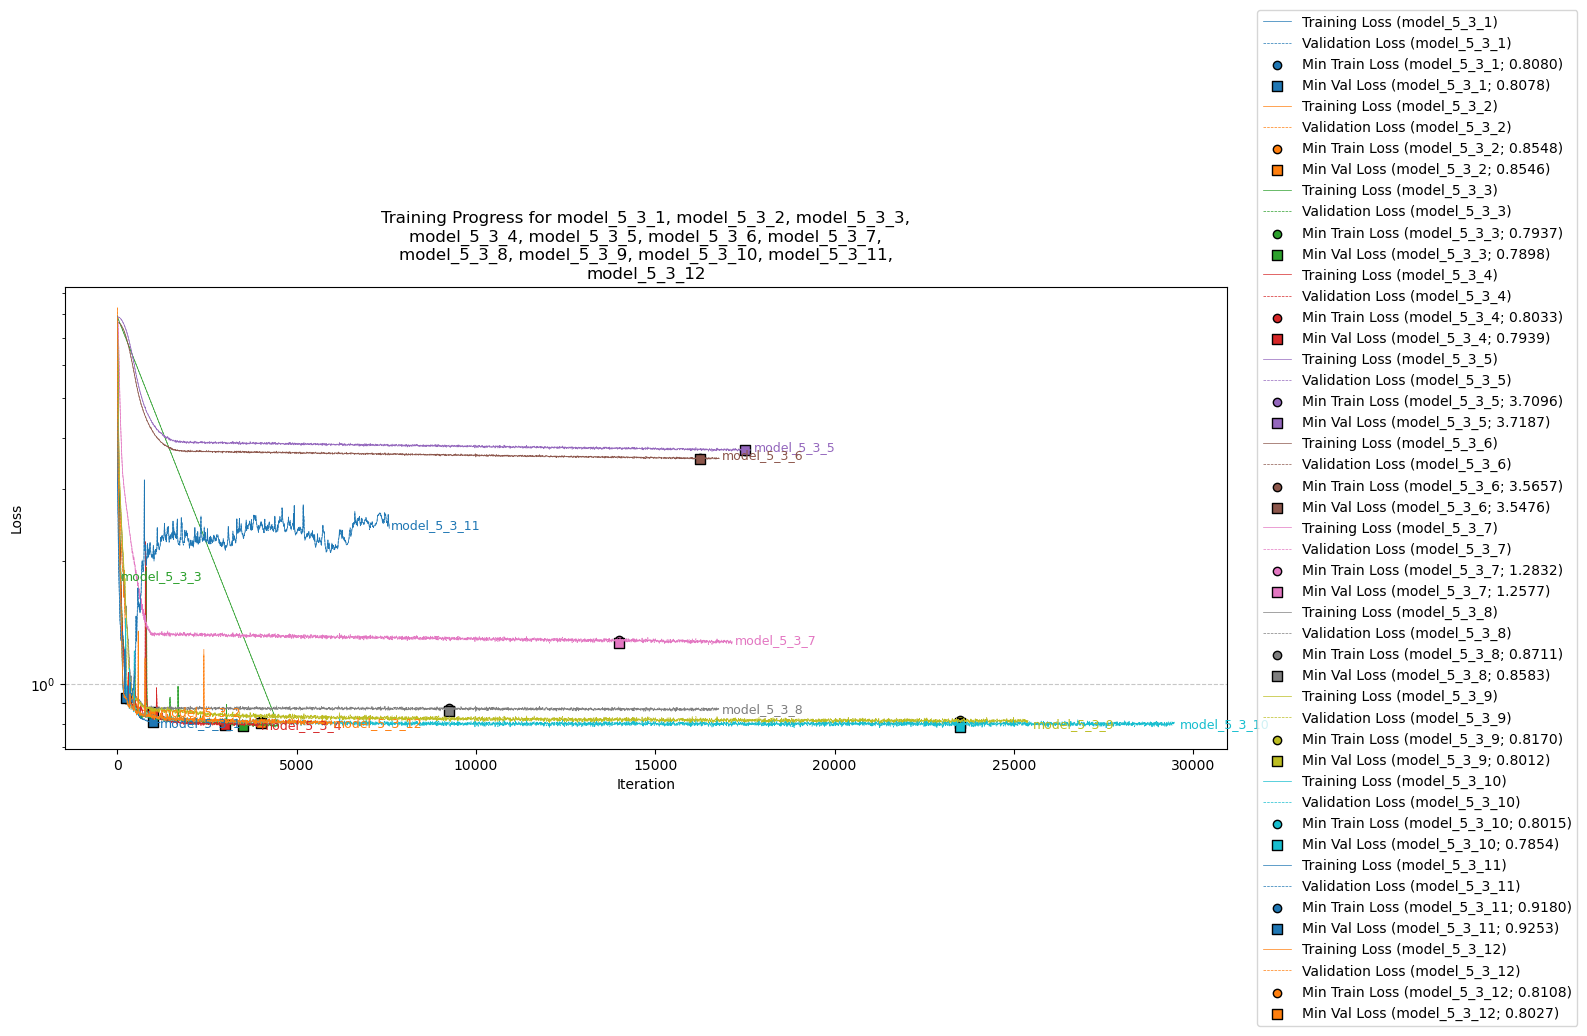

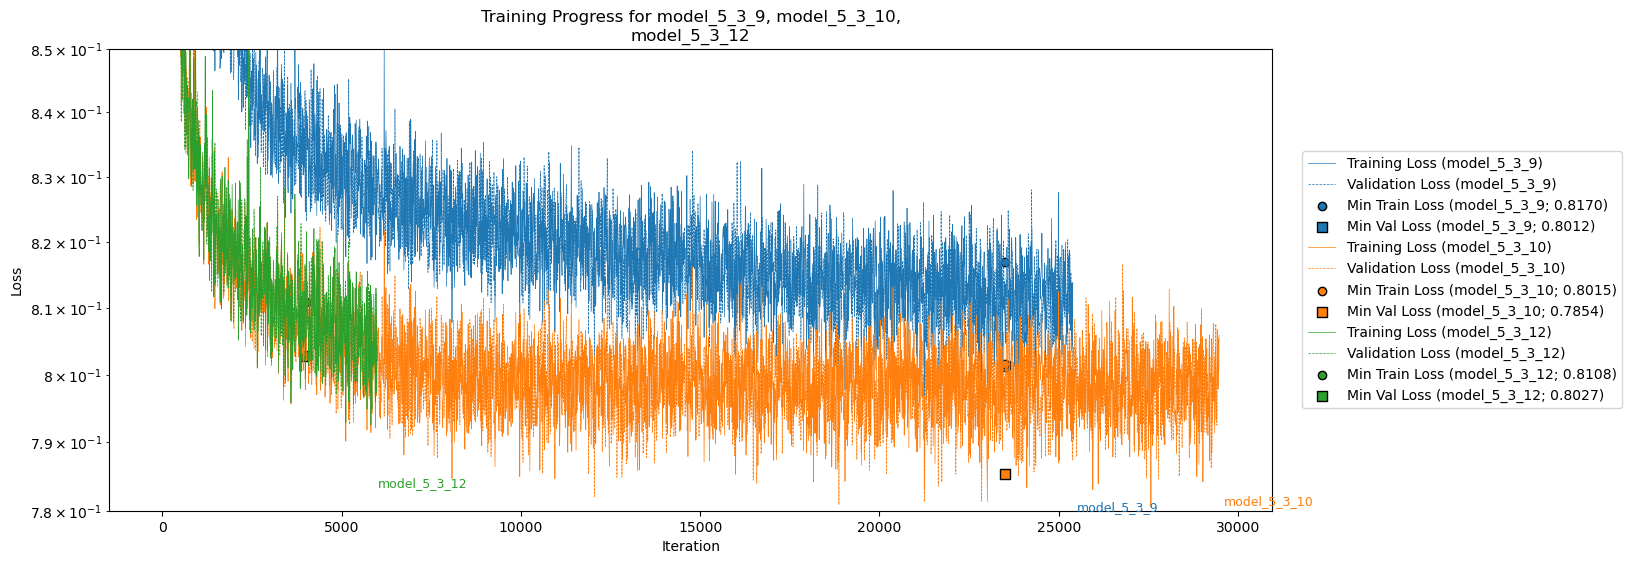

In [8]:
# Training graphs
plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True)
models_to_compare = ['model_5_3_9', 'model_5_3_10', 'model_5_3_12']
plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, y_lim=[0.78, 0.85], use_log_scale=True)

In [ ]:
# models_to_compare = ['model_5_3_1', 'model_5_3_2', 'model_5_3_3', 'model_5_3_4', 'model_5_3_5', 'model_5_3_6', 'model_5_3_7', 'model_5_3_8', 'model_5_3_9', 'model_5_3_10', 'model_5_3_11', 'model_5_3_12']
models_to_compare = ['model_5_3_8', 'model_5_3_9', 'model_5_3_10', 'model_5_3_12']
for column in columns:
    if column == 'pdgid':
        continue
    compare_distributions(models_to_compare, column_name=column, juxtaposed=True, dists_per_row=5)

#### Comparing different number of layers and their effect on validation loss and model distributions

In [ ]:
models_to_compare = ['model_5_3_13', 'model_5_3_14', 'model_5_3_15', 'model_5_3_16', 'model_5_3_17', 'model_5_3_18']
df = get_default_df(models_to_compare)
df = df.sort_values(by='min_saved_val_loss')

# Calculate log10 values for the logarithmic plot
df['learning_rate_log10'] = np.log10(df['learning_rate'])
df['min_lr_log10'] = np.log10(df['min_lr'])

# Table
display(df)

In [ ]:
min_val_loss_row = df.loc[df['min_saved_val_loss'].idxmin()]

# Normal plot
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax.scatter(df['learning_rate'], df['min_lr'], df['min_saved_val_loss'], c=df['min_saved_val_loss'], cmap='viridis', s=60)
ax.scatter([min_val_loss_row['learning_rate']], [min_val_loss_row['min_lr']], [min_val_loss_row['min_saved_val_loss']], color='red', s=100, label=f'Best Model: {min_val_loss_row["model_name"]}')
for x, y, z, label in zip(df['learning_rate'], df['min_lr'], df['min_saved_val_loss'], df['model_name']):
    ax.text(x, y, z, label, size=8)
ax.set_xlabel('learning_rate')
ax.set_ylabel('min_lr')
ax.set_zlabel('min_saved_val_loss')
fig.colorbar(scatter, ax=ax, label='Min Val Loss')
ax.legend()

# Log plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax.scatter(df['learning_rate_log10'], df['min_lr_log10'], df['min_saved_val_loss'], c=df['min_saved_val_loss'], cmap='viridis', s=60)
ax.scatter([min_val_loss_row['learning_rate_log10']], [min_val_loss_row['min_lr_log10']], [min_val_loss_row['min_saved_val_loss']], color='red', s=100, label=f'Best Model: {min_val_loss_row["model_name"]}')
for x, y, z, label in zip(df['learning_rate_log10'], df['min_lr_log10'], df['min_saved_val_loss'], df['model_name']):
    ax.text(x, y, z, label, size=8)
ax.set_xlabel('log10(learning_rate)')
ax.set_ylabel('log10(min_lr)')
ax.set_zlabel('min_saved_val_loss')
fig.colorbar(scatter, ax=ax, label='Min Val Loss')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Training graphs
plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True)
plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, y_lim=[0.78, 0.85], use_log_scale=True)

In [ ]:
models_to_compare = ['model_5_3_13', 'model_5_3_14', 'model_5_3_15', 'model_5_3_17', 'model_5_3_18']
for column in columns:
    if column == 'pdgid':
        continue
    compare_distributions(models_to_compare, column_name=column, juxtaposed=True, dists_per_row=5)

#### Investigating the broken eta distribution

In [ ]:
import csv

columns = ["num_particles", "pdgid", "e", "px", "py", "pz", "eta", "theta", "phi"]

def get_common_data(model_name):
    dictionary_filename = pUtil.get_model_preparation_dir(model_name) / 'dictionary.json'
    # real_leading_test_particles_filename = pUtil.get_model_preparation_dir(model_name) / 'real_leading_test_particles.csv'
    real_leading_test_particles_filename = pUtil.get_temp_dir() / 'real_leading_test_particles.txt'
    sampled_leading_particles_filename = pUtil.get_latest_sampling_dir(model_name) / 'sampled_leading_particles.csv'

    with open(dictionary_filename) as dictionary_file:
        dictionary = json.load(dictionary_file)

    # Convenience dictionary definitions
    p_bin_count = (dictionary["e_bin_data"]["max"] - dictionary["e_bin_data"]["min"]) // 1000
    e_bin_count = (dictionary["e_bin_data"]["max"] - dictionary["e_bin_data"]["min"]) // dictionary["e_bin_data"]["step_size"]
    eta_bin_count = int((dictionary["eta_bin_data"]["max"] - dictionary["eta_bin_data"]["min"]) // dictionary["eta_bin_data"]["step_size"])
            
    bin_settings = {
        "num_particles": { "min": 0,                                 "max": 50,                                "bins": 50 },
        "e":             { "min": dictionary["e_bin_data"]["min"],   "max": dictionary["e_bin_data"]["max"],   "bins": e_bin_count },
        "px":            { "min": dictionary["e_bin_data"]["min"],   "max": dictionary["e_bin_data"]["max"],   "bins": p_bin_count },
        "py":            { "min": dictionary["e_bin_data"]["min"],   "max": dictionary["e_bin_data"]["max"],   "bins": p_bin_count },
        "pz":            { "min": dictionary["e_bin_data"]["min"],   "max": dictionary["e_bin_data"]["max"],   "bins": p_bin_count },
        "eta":           { "min": dictionary["eta_bin_data"]["min"], "max": dictionary["eta_bin_data"]["max"], "bins": eta_bin_count },
        "theta":         { "min": -2 * np.pi,                        "max": 2 * np.pi,                         "bins": int((4 * np.pi) // dictionary["theta_bin_data"]["step_size"]) },
        "phi":           { "min": -2 * np.pi,                        "max": 2 * np.pi,                         "bins": int((4 * np.pi) // dictionary["phi_bin_data"]["step_size"]) },
    }

    df1 = pd.read_csv(real_leading_test_particles_filename, sep=" ", names=columns, engine="c", header=None)
    df2 = pd.read_csv(sampled_leading_particles_filename, sep=" ", names=columns, engine="c", header=None)
    return bin_settings, df1, df2

def generate_distributions(model_name, column_name, ax=None):
    bin_settings, df1, df2 = get_common_data(model_name)
    
    min_val = bin_settings[column_name]['min']
    max_val = bin_settings[column_name]['max']
    bins = bin_settings[column_name]['bins']
    
    df1_weights = np.ones_like(df1[column_name]) / len(df1[column_name])
    df2_weights = np.ones_like(df2[column_name]) / len(df2[column_name])
    
    ax = ax or plt
    ax.hist(df1[column_name], bins=bins, weights=df1_weights, range=(min_val, max_val), edgecolor="black", alpha=0.7, color="blue", label=f'Input ({model_name})')
    ax.hist(df2[column_name], bins=bins, weights=df2_weights, range=(min_val, max_val), edgecolor="black", alpha=0.7, color="orange", label=f'Sampled ({model_name})')
    if ax is not plt:
        ax.set_xlabel(column_name)
        ax.set_ylabel('Frequency (Normalized)')
        ax.set_title(f'{model_name}')
        ax.legend()

def compare_distributions(models_to_compare, column_name, juxtaposed=True, dists_per_row=3):
    if juxtaposed:
        num_horizontal, num_vertical = min(len(models_to_compare), dists_per_row), (math.ceil(len(models_to_compare) / dists_per_row))
        figure, axes = plt.subplots(num_vertical, num_horizontal, figsize=(8 * num_horizontal, 6 * num_vertical), sharex=False, sharey=True)
        if len(models_to_compare) == 1:
            axes = [axes]
        axes = np.atleast_1d(axes).flatten()
        for model_name, ax in zip(models_to_compare, axes):
            generate_distributions(model_name, column_name=column_name, ax=ax)
        figure.suptitle(f'Training Progress for {", ".join(models_to_compare)}')
        plt.tight_layout()
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()
    else:
        plt.figure(figsize=(15, 6))
        for model_name in models_to_compare:
            generate_distributions(model_name, column_name=column_name)
        plt.title(f'Training Progress for {", ".join(models_to_compare)}')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(axis="y", linestyle="--", alpha=0.7)

models_to_compare = ['model_5_2_1']
for column in columns:
    if column == 'pdgid':
        continue
    compare_distributions(models_to_compare, column_name=column, juxtaposed=True, dists_per_row=5)

The eta distribution seems to be fine. There is something about the tokenizer that creates the brokenness in the distributions.
Furthermore this shows we should probably start comparing tokenized to tokenized not real to tokenized.

#### Comparing different tokenization schemes

In [ ]:
all_model_names = pUtil.get_all_model_names()
all_model_names.remove('model_2_4_batchtest6')
all_model_names.remove('model_2_4_batchtest7')
all_model_names.remove('model_5_7_batchtest6')
all_model_names.remove('model_5_7_batchtest7')
df = get_default_df(all_model_names)

prep5_df = df[df['preparation_name'].isin(['preparation_5_3', 'preparation_5_5', 'preparation_5_6', 'preparation_5c1_1'])]
prep5_df['effective_batch_size'] = prep5_df['batch_size'] * 40
# display(prep5_df)

npb_df = df[df['scheme'] == 'no_particle_boundaries']
pv2_df = df[df['scheme'] == 'paddingv2']
# # ne_df = df[df['scheme'] == 'no_eta']
# display(npb_df)
# display(pv2_df)

combined_df = df[(df['scheme'].isin(['no_particle_boundaries', 'paddingv2']))].copy()
testing_df = prep5_df
metrics_df = testing_df[['model_name', 'scheme', 'batch_size', 'effective_batch_size', 'min_saved_val_loss'] + get_model_metrics_columns()]

coverage_sort = metrics_df.sort_values(by='coverage', ascending=False)
coverage_sort_styled = coverage_sort.style.set_properties(**{'background-color': '#555555'}, subset=['coverage'])

mmd_sort = metrics_df.sort_values(by='mmd', ascending=True)
mmd_sort_styled = mmd_sort.style.set_properties(**{'background-color': '#555555'}, subset=['mmd'])

kpd_sort = metrics_df.sort_values(by='kpd_median', ascending=True)
kpd_sort_styled = kpd_sort.style.set_properties(**{'background-color': '#555555'}, subset=['kpd_median'])

fpd_sort = metrics_df.sort_values(by='fpd_value', ascending=True)
fpd_sort_styled = fpd_sort.style.set_properties(**{'background-color': '#555555'}, subset=['fpd_value'])

w1m_sort = metrics_df.sort_values(by='w1m_score', ascending=True)
w1m_sort_styled = w1m_sort.style.set_properties(**{'background-color': '#555555'}, subset=['w1m_score'])

w1p_eta_sort = metrics_df.sort_values(by='w1p_avg_eta', ascending=True)
w1p_eta_sort_styled = w1p_eta_sort.style.set_properties(**{'background-color': '#555555'}, subset=['w1p_avg_eta'])

w1p_phi_sort = metrics_df.sort_values(by='w1p_avg_phi', ascending=True)
w1p_phi_sort_styled = w1p_phi_sort.style.set_properties(**{'background-color': '#555555'}, subset=['w1p_avg_phi'])

w1p_pt_sort = metrics_df.sort_values(by='w1p_avg_pt', ascending=True)
w1p_pt_sort_styled = w1p_pt_sort.style.set_properties(**{'background-color': '#555555'}, subset=['w1p_avg_pt'])

display(Markdown("### Coverage Sorted DataFrame (descending)"))
display(coverage_sort_styled)
display(Markdown("### MMD Sorted DataFrame (ascending)"))
display(mmd_sort_styled)
display(Markdown("### KPD Median Sorted DataFrame (ascending)"))
display(kpd_sort_styled)
display(Markdown("### FPD Value Sorted DataFrame (ascending)"))
display(fpd_sort_styled)
display(Markdown("### W1M Score Sorted DataFrame (ascending)"))
display(w1m_sort_styled)
display(Markdown("### W1P Avg (Eta) Sorted DataFrame (ascending)"))
display(w1p_eta_sort_styled)
display(Markdown("### W1P Avg (Phi) Sorted DataFrame (ascending)"))
display(w1p_phi_sort_styled)
display(Markdown("### W1P Avg (PT) Sorted DataFrame (ascending)"))
display(w1p_pt_sort_styled)

In [ ]:
top_performing_models = [
    coverage_sort.iloc[0]['model_name'],
    mmd_sort.iloc[0]['model_name'],
    kpd_sort.iloc[0]["model_name"],
    fpd_sort.iloc[0]['model_name'],
    w1m_sort.iloc[0]['model_name'],
    w1p_eta_sort.iloc[0]['model_name'],
    w1p_phi_sort.iloc[0]['model_name'],
    w1p_pt_sort.iloc[0]['model_name']
]

print(top_performing_models)

for column in columns:
    if column == 'pdgid':
        continue
    compare_distributions(top_performing_models, column_name=column, juxtaposed=True, dists_per_row=5)

In [ ]:
npb_models_to_compare = npb_df['model_name'].tolist()
pv2_models_to_compare = pv2_df['model_name'].tolist()

all_models_to_compare = npb_models_to_compare + pv2_models_to_compare
for column in columns:
    if column == 'pdgid':
        continue
    compare_distributions(all_models_to_compare, column_name=column, juxtaposed=True, dists_per_row=5)

#### Comparing different batch sizes and their effect on convergence

In [ ]:
models_to_compare = [
    'model_2_4_batchtest1',
    'model_2_4_batchtest2',
    'model_2_4_batchtest3',
    'model_2_4_batchtest4',
    'model_2_4_batchtest5',
    # 'model_2_4_batchtest6',
    # 'model_2_4_batchtest7',
    'model_5_7_batchtest1',
    'model_5_7_batchtest2',
    'model_5_7_batchtest3',
    'model_5_7_batchtest4',
    'model_5_7_batchtest5',
    # 'model_5_7_batchtest6',
    # 'model_5_7_batchtest7'
]

df = get_default_df(models_to_compare)
df = df.sort_values(by='min_saved_val_loss')
df['effective_batch_size'] = df['batch_size'] * 40
df = df[['model_name', 'num_train_tokens', 'batch_size', 'effective_batch_size', 'min_saved_train_loss', 'min_saved_val_loss']]
display(df)

# plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True)
plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True, y_lim=[2.6, 3.1])
# plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True, y_lim=[2.6, 3.1])
plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True, y_lim=[2.8, 3])

## <span style="color:#db7d60">Keeping track of things</span>

In [ ]:
df = get_default_df(['model_5_6_1', 'model_5_6_2', 'model_5_6_3', 'model_5_6_4'])
df.plot(kind='scatter', x = 'learning_rate', y = 'min_saved_val_loss')
display(df)

#### This is a mega table full of everything from all the trained models.

In [ ]:
all_model_names = pUtil.get_all_model_names()
df = get_default_df(all_model_names)
df = df.applymap(lambda x: f"{x:,}" if isinstance(x, int) else x)
display(df)

In [ ]:
all_model_names = pUtil.get_all_model_names()
plot_train_graphs(all_model_names, juxtaposed=False, use_epochs=False, use_log_scale=True)

#### Create a train graph for all the models trained on 5_3.

In [ ]:
models_to_compare = [
    'model_5_3_1',
    'model_5_3_2',
    'model_5_3_3',
    'model_5_3_4',
    'model_5_3_5',
    'model_5_3_6',
    'model_5_3_7',
    'model_5_3_8',
    'model_5_3_9',
    'model_5_3_10',
    'model_5_3_11',
    'model_5_3_12',
    'model_5_3_13',
    'model_5_3_14',
    'model_5_3_15',
    'model_5_3_16',
    'model_5_3_17',
    'model_5_3_18',
    'model_5_3_19',
    'model_5_3_20',
    'model_5_3_21'
]

plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True)
plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True, y_lim=[0.7, 1])

##### Tracking models without particle boundaries. All of the 5_5 models.

In [ ]:
models_to_compare = [
    'model_5_5_1',
    'model_5_5_2',
    'model_5_5_3',
    'model_5_5_4',
    'model_5_5_5',
    'model_5_5_6'
]

plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True)
plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True, y_lim=[1, 2])
plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True, y_lim=[1, 1.4])

#### Tracking models without particles boundaries in the padding (paddingv2 models). All of the 5_6 models.

In [ ]:
models_to_compare = [
    'model_5_6_1',
    'model_5_6_2',
    'model_5_6_3',
    'model_5_6_4'
]

plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True)

#### Tracking the different scheme based models.

In [ ]:
all_model_names = pUtil.get_all_model_names()
df = get_default_df(all_model_names)
df = df.applymap(lambda x: f"{x:,}" if isinstance(x, int) else x)

df = df[df['preparation_name'].isin(['preparation_5_4', 'preparation_5_5', 'preparation_5_6'])]
df_sorted_by_min_val_loss = df.sort_values(by="min_saved_val_loss", ascending=True)

# df_sorted_by_min_val_loss = df_sorted_by_min_val_loss.style.background_gradient(cmap='RdYlGn_r', subset=['min_saved_val_loss'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
display(df_sorted_by_min_val_loss)

In [ ]:
all_model_names = pUtil.get_all_model_names()
df = get_default_df(all_model_names)
df = df[df['preparation_name'].isin(['preparation_5_4', 'preparation_5_5', 'preparation_5_6'])]
model_names_list = df['model_name'].tolist()
plot_train_graphs(model_names_list, juxtaposed=False, use_epochs=False, use_log_scale=True)

#### This is to check the relationship between val loss and the distributions.

Basically, even though the val loss is high after some changes* I think the distributions will be fine. This portion will be used to compare both the distributions visually and also the metrics.
* Changes meaning the type embedding and ignoring the padding token.

In [ ]:
models_to_compare = ['model_5_3_22', 'model_5_5_4', 'model_5_5_5', 'model_5_5_6', 'model_5_6_1', 'model_5_6_2', 'model_5_6_3', 'model_5_6_4']
df = get_default_df(models_to_compare)
df = df.applymap(lambda x: f"{x:,}" if isinstance(x, int) else x)

df_sorted_by_min_val_loss = df.sort_values(by="min_saved_val_loss", ascending=True)
display(df_sorted_by_min_val_loss)

plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True)

models_to_compare = ['model_5_3_22', 'model_5_5_6', 'model_5_6_2', 'model_5_6_4']
for column in columns:
    if column == 'pdgid':
        continue
    compare_distributions(models_to_compare, column_name=column, juxtaposed=True, dists_per_row=5)

#### Distributions for 5_5_1 and 5_5_5

In [ ]:
models_to_compare = ['model_5_5_1', 'model_5_5_5']
for column in columns:
    if column == 'pdgid':
        continue
    compare_distributions(models_to_compare, column_name=column, juxtaposed=True, dists_per_row=5)